In [1]:
import market
import simulate
import withdrawal
import harvesting
import metrics
import lens
import plot
from decimal import Decimal as D
import pandas

%matplotlib inline
import seaborn
from matplotlib import pyplot as plt
import matplotlib
seaborn.set(style="whitegrid")
seaborn.set_context('poster')

In [14]:
length = 30
rate = D('.04')
s = simulate.calc_lens(harvesting.N_80_RebalanceHarvesting,
                   lambda p, h: withdrawal.ConstantDollar(p, h, rate=rate),
                   length,
                   lambda n: n[-1].portfolio_post.value_r,
                   portfolio=(800_000, 200_000)
                  )
# it comes back as Decimal which seaborn doesn't like
s = s.astype(int)

In [23]:
s.sort_values()[-10:]

1873    5363952
1985    5616188
1921    5633536
1975    5810004
1872    5835692
1871    5847002
1943    5856854
1933    6220595
1877    6522786
1932    6898112
dtype: int32

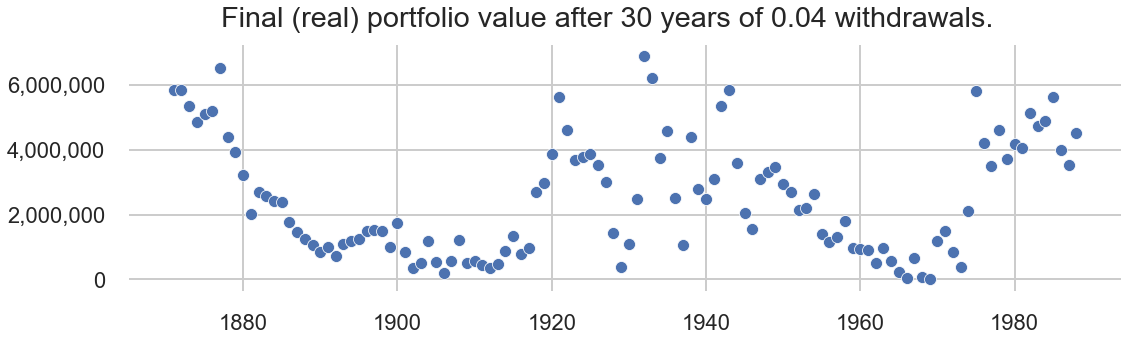

In [15]:
#g = s.astype(int).plot()
g = seaborn.relplot(data=s, aspect=3)
g.despine(left=True, bottom=True, offset=20)
#g.set_xticklabels(['4%', '4.5%', '5%'])
g.fig.suptitle(f'Final (real) portfolio value after {length} years of {rate} withdrawals.')
g.ax.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

138 21


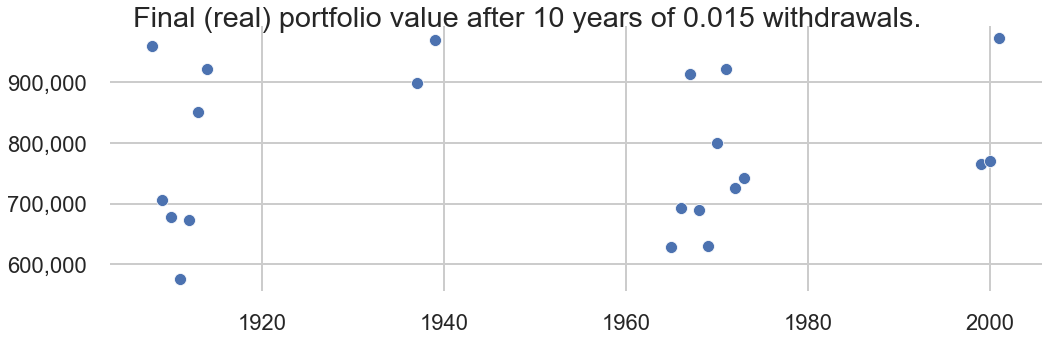

In [4]:
g = seaborn.relplot(data=s[s<1_000_000], aspect=3)
g.despine(left=True, bottom=True, offset=20)
#g.set_xticklabels(['4%', '4.5%', '5%'])
g.fig.suptitle(f'Final (real) portfolio value after {length} years of {rate} withdrawals.')
print(len(s), len(s[s<1_000_000]))
g.ax.yaxis.set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

Text(0.5, 0.98, 'Final (real) portfolio value after 10 years of 0.015 withdrawals.')

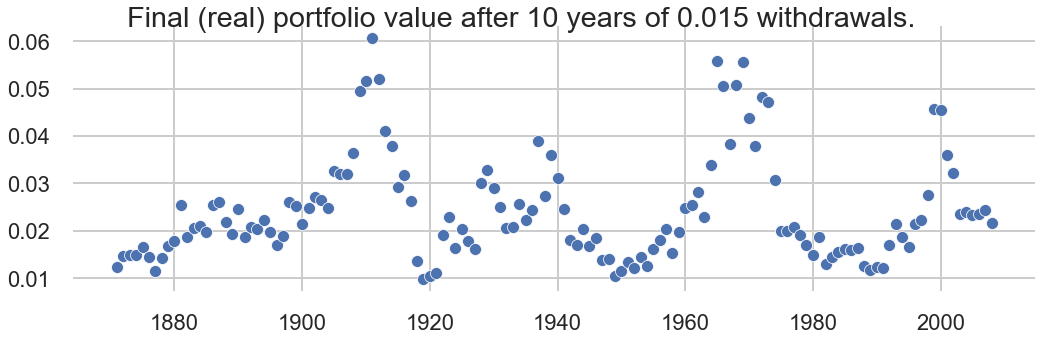

In [5]:
#g = s.astype(int).plot()
new_s = 35_000 / s
g = seaborn.relplot(data=new_s, aspect=3)
g.despine(left=True, bottom=True, offset=20)
#g.set_xticklabels(['4%', '4.5%', '5%'])
g.fig.suptitle(f'Final (real) portfolio value after {length} years of {rate} withdrawals.')

Text(0.5, 0.98, 'Current withdrawal rate after 10 years of 0.015 withdrawals.')

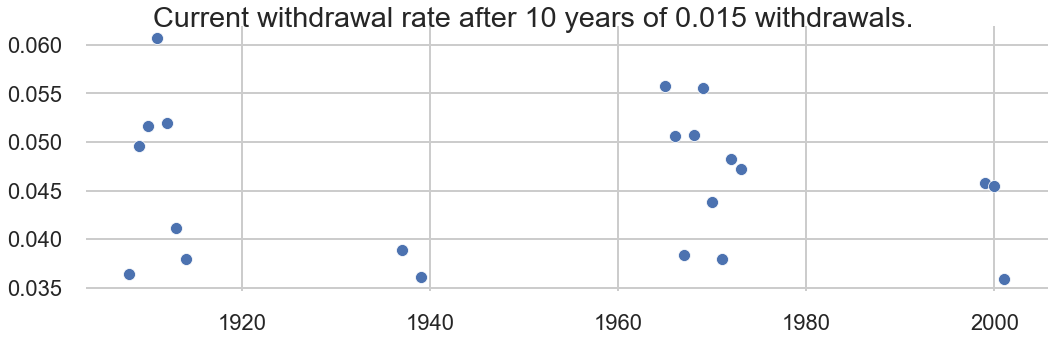

In [6]:
#g = seaborn.relplot(data=new_s[new_s>0.035], aspect=3)
a = s[s<1_000_000]
a = 35_000 / a
a = a[a>0.035]
g = seaborn.relplot(data=a, aspect=3)
g.despine(left=True, bottom=True, offset=20)
g.fig.suptitle(f'Current withdrawal rate after {length} years of {rate} withdrawals.')

In [7]:
s[s<1_000_000]

1908    960357
1909    705972
1910    678219
1911    576161
1912    673682
1913    851619
1914    922250
1937    899551
1939    970559
1965    627521
1966    691874
1967    913263
1968    689743
1969    630031
1970    799332
1971    923058
1972    725636
1973    741717
1999    764792
2000    769523
2001    973995
dtype: int32

In [8]:
single_s = simulate.calc_lens(harvesting.N_80_RebalanceHarvesting,
                   lambda p, h: withdrawal.ConstantDollar(p, h, rate=D('.035')),
                   55,
                   lens.calc_pwa0,
                   portfolio=(800_000, 200_000)
                  )

In [9]:
single_s[single_s>0].min()

Decimal('0.03564664276214576219436247376')

In [10]:
f = [0] * 115
for value in s[s<1_000_000]:
    sy = simulate.calc_lens(harvesting.N_80_RebalanceHarvesting,
               lambda p, h: withdrawal.ConstantDollar(p, h, rate=D(35_000 / value)),
               45,
               lens.calc_shortfall_years,
               portfolio=(800_000, 200_000)
    )
    failures = sy[sy>0]
    f.append(len(failures) / len(sy))
fs = pandas.Series(f)

In [11]:
1 - fs.mean()

0.9613792118789264

In [12]:
fs[fs>0].sort_values(ascending=False)

118    0.582524
124    0.543689
128    0.524272
119    0.427184
117    0.407767
127    0.378641
125    0.378641
116    0.349515
132    0.300971
131    0.300971
133    0.271845
134    0.252427
129    0.233010
120    0.126214
122    0.038835
121    0.038835
126    0.038835
130    0.038835
123    0.009709
115    0.009709
dtype: float64

In [13]:
len(fs[fs>0.4])/len(fs[fs>0])

0.25